# Plan
- step01(PASS) : deepseekocr로 table을 제외한 이미지 구역을 추출
- step02 : 이미지 구역에서 심볼을 기준으로 크롭하고 다음 단계로(sketch_detection_sysmbol_v1,v2)
- step03 :각 크롭한 이미지를 ocr로 텍스트 추출하기 : deepseekocr -> **다른 OCR**(tesseract, paddle)

### setting

In [1]:
import cv2, os
from symbol_region_splitter import *
from utils import visualize_detections, show_image_highres
# import pytesseract
from paddleocr import PaddleOCR

### 테스트할 도면과 저장 위치 지정
# image_file = '../data/hard_task_test01_v1.PNG'
image_file = '../data/hard_task_test01_v1.PNG'
output_path = './result_v3_paddle'
symbol_path = '../data/symbol_mini.PNG'

# Tesseract 설정
# tesseract_lang = 'kor+eng'  # 한글 + 영어
os.makedirs(output_path, exist_ok=True)


### step02-03

탐지된 심볼 수 (중복 제거 후): 6


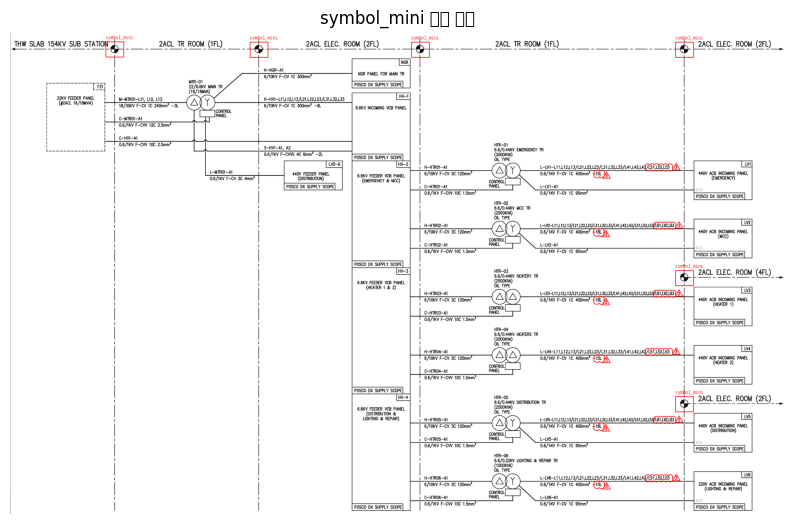

In [3]:
# 이미지 로드
drawing = cv2.imread(image_file)
if drawing is None:
    raise FileNotFoundError(f"도면을 찾을 수 없습니다: {image_file}")
drawing_gray = cv2.cvtColor(drawing, cv2.COLOR_BGR2GRAY)

symbol_img = cv2.imread(symbol_path)
if symbol_img is None:
    raise FileNotFoundError(f"심볼 이미지를 찾을 수 없습니다: {symbol_path}")
symbol_gray = cv2.cvtColor(symbol_img, cv2.COLOR_BGR2GRAY)
symbol_name = os.path.splitext(os.path.basename(symbol_path))[0]


# 심볼 매칭 & 중복 제거 & 시각화
filtered_boxes = match_symbol(drawing_gray, symbol_gray, threshold=0.75)
visualize_detections(drawing, filtered_boxes, symbol_name)

# 중심 좌표 계산
centers_x = [(x1 + x2)//2 for (x1, y1, x2, y2) in filtered_boxes]
centers_y = [(y1 + y2)//2 for (x1, y1, x2, y2) in filtered_boxes]

# 영역 분할 & (off)확대 ROI 시각화
# regions = split_and_extract_regions(drawing, centers_x, centers_y, fallback=20, zoom_factor=2.0)
regions = split_regions_vertical(drawing, centers_x, fallback=20, zoom_factor=2.0)

# # ROI 확인
# for region_id, roi in regions:
#     show_image_highres(roi, f"Region {region_id}", zoom=1.0, dpi=150)


[2025/11/10 05:04:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/dibaeck/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/dibaeck/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

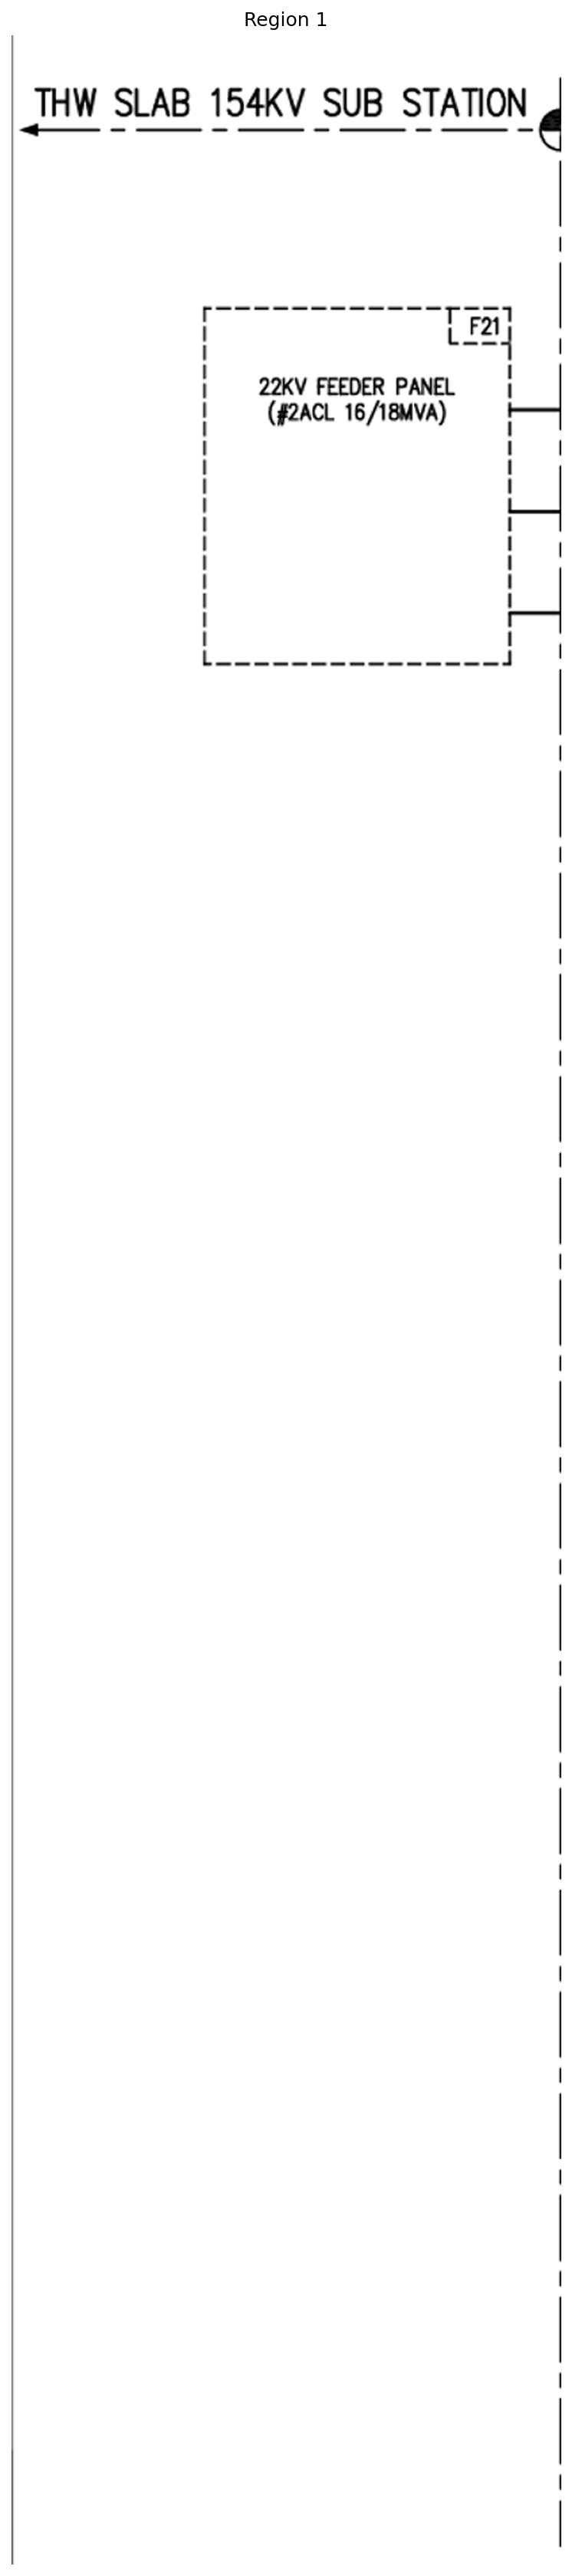

[2025/11/10 05:04:31] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2025/11/10 05:04:31] ppocr DEBUG: dt_boxes num : 4, elapse : 0.04105567932128906
[2025/11/10 05:04:31] ppocr DEBUG: rec_res num  : 4, elapse : 0.03739356994628906
[OCR 완료] Region 1 → 65 chars
[Region 1] OCR 결과:
THW SLAB 154KV SUB STATION
F21
22KV FEEDER PANEL
(#2ACL 16/18MVA)



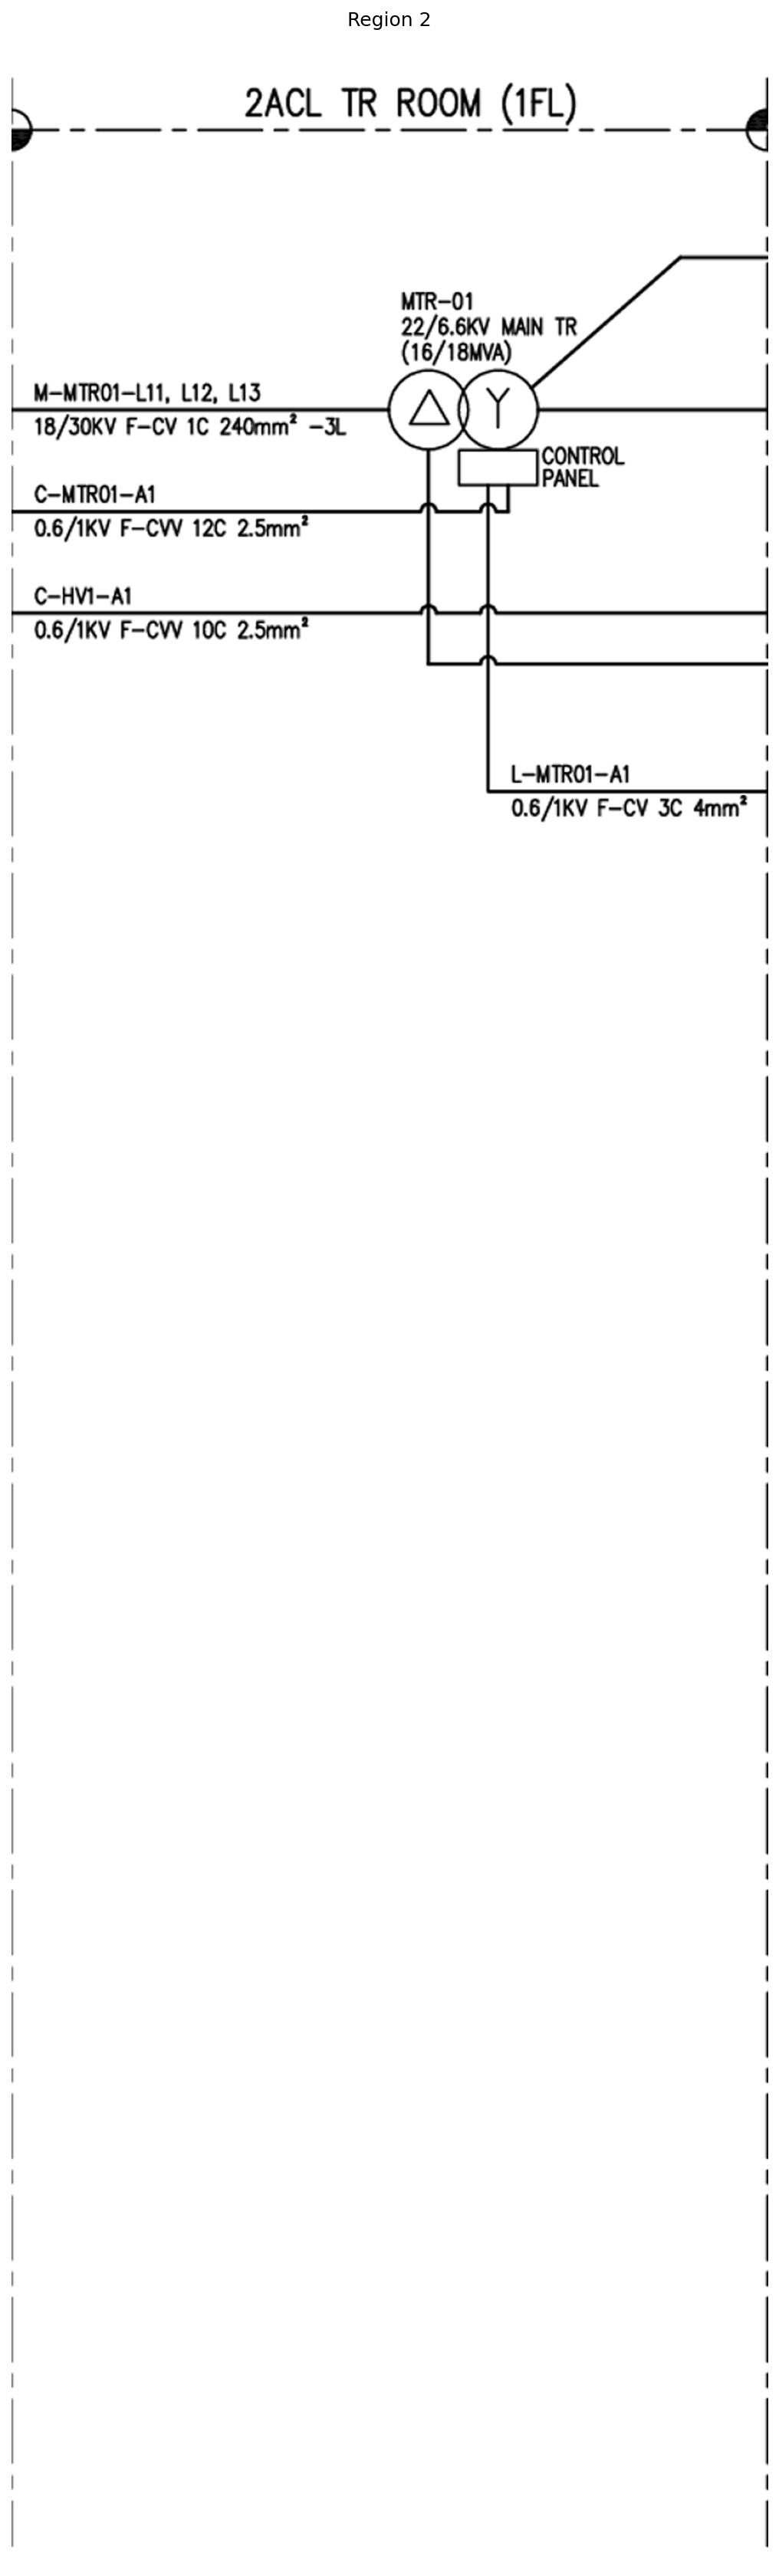

[2025/11/10 05:04:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2025/11/10 05:04:32] ppocr DEBUG: dt_boxes num : 14, elapse : 0.04859423637390137
[2025/11/10 05:04:32] ppocr DEBUG: rec_res num  : 14, elapse : 0.06959366798400879
[OCR 완료] Region 2 → 214 chars
[Region 2] OCR 결과:
2ACL TR ROOM (1FL)
MTR-01
22/6.6KV MAIN TR
(16/18MVA)
M-MTRO1-L11,L12L13
18/30KV F-CV 1C 240mm2 -3L
CONTROL
PANEL
C-MTRO1-A1
0.6/1KV F-CWV 12C 2.5mm2
C-HV1-A1
0.6/1KV F-CWV 10C 2.5mma
L-MTRO1-A1
0.6/1KV F-CV 3C 4mm



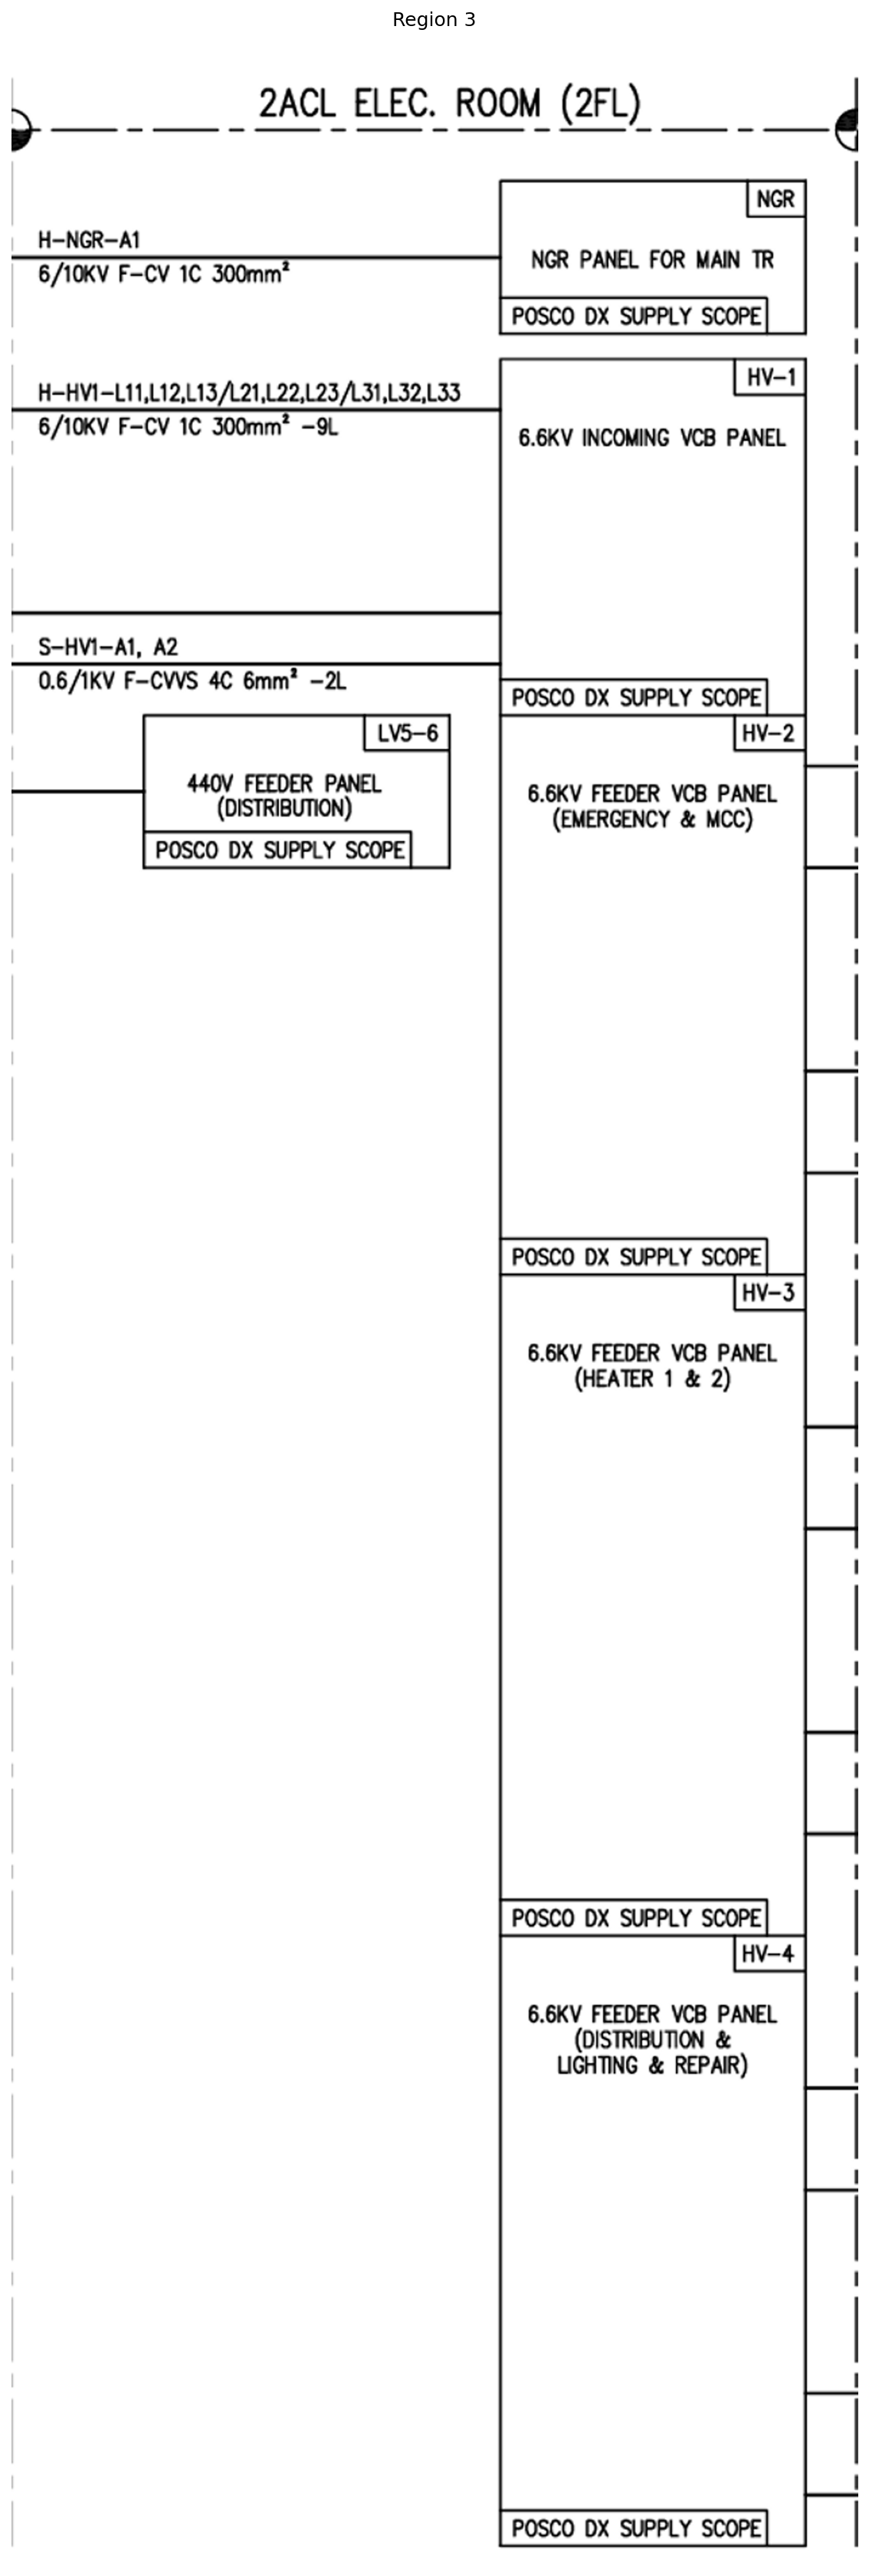

[2025/11/10 05:04:34] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2025/11/10 05:04:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.06365060806274414
[2025/11/10 05:04:34] ppocr DEBUG: rec_res num  : 30, elapse : 0.15981268882751465
[OCR 완료] Region 3 → 539 chars
[Region 3] OCR 결과:
2ACL ELEC. ROOM (2FL)
NGR
H-NGR-A1
NGR PANEL FOR MAIN TR
6/10KV F-CV 1C 300mm
 POSCO DX SUPPLY SCOPE
HV-1
H-HV1-L11,L12,L13/L21,L22,L23/L31L32,L33
6/10KV F-CV 1C 300mm2 -9L
6.6KV INCOMING VCB PANEL
S-HV1-A1, A2
0.6/1KV F-CVVS 4C 6mma -2L
POSCO DX SUPPLY SCOPE
LV5-6
HV-2
440V FEEDER PANEL
6.6KV FEEDER VCB PANEL
(DISTRIBUTION)
(EMERGENCY & MCC)
POSCO DX SUPPLY SCOPE
POSCO DX SUPPLY SCOPE
HV-3
6.6KV FEEDER VCB PANEL
(HEATER 1 & 2)
POSCO DX SUPPLY SCOPE
HV-4
6.6KV FEEDER VCB PANEL
(DISTRIBUTION &
LIGHTING & REPAIR)
 POSCO DX SUPPLY SCOPE



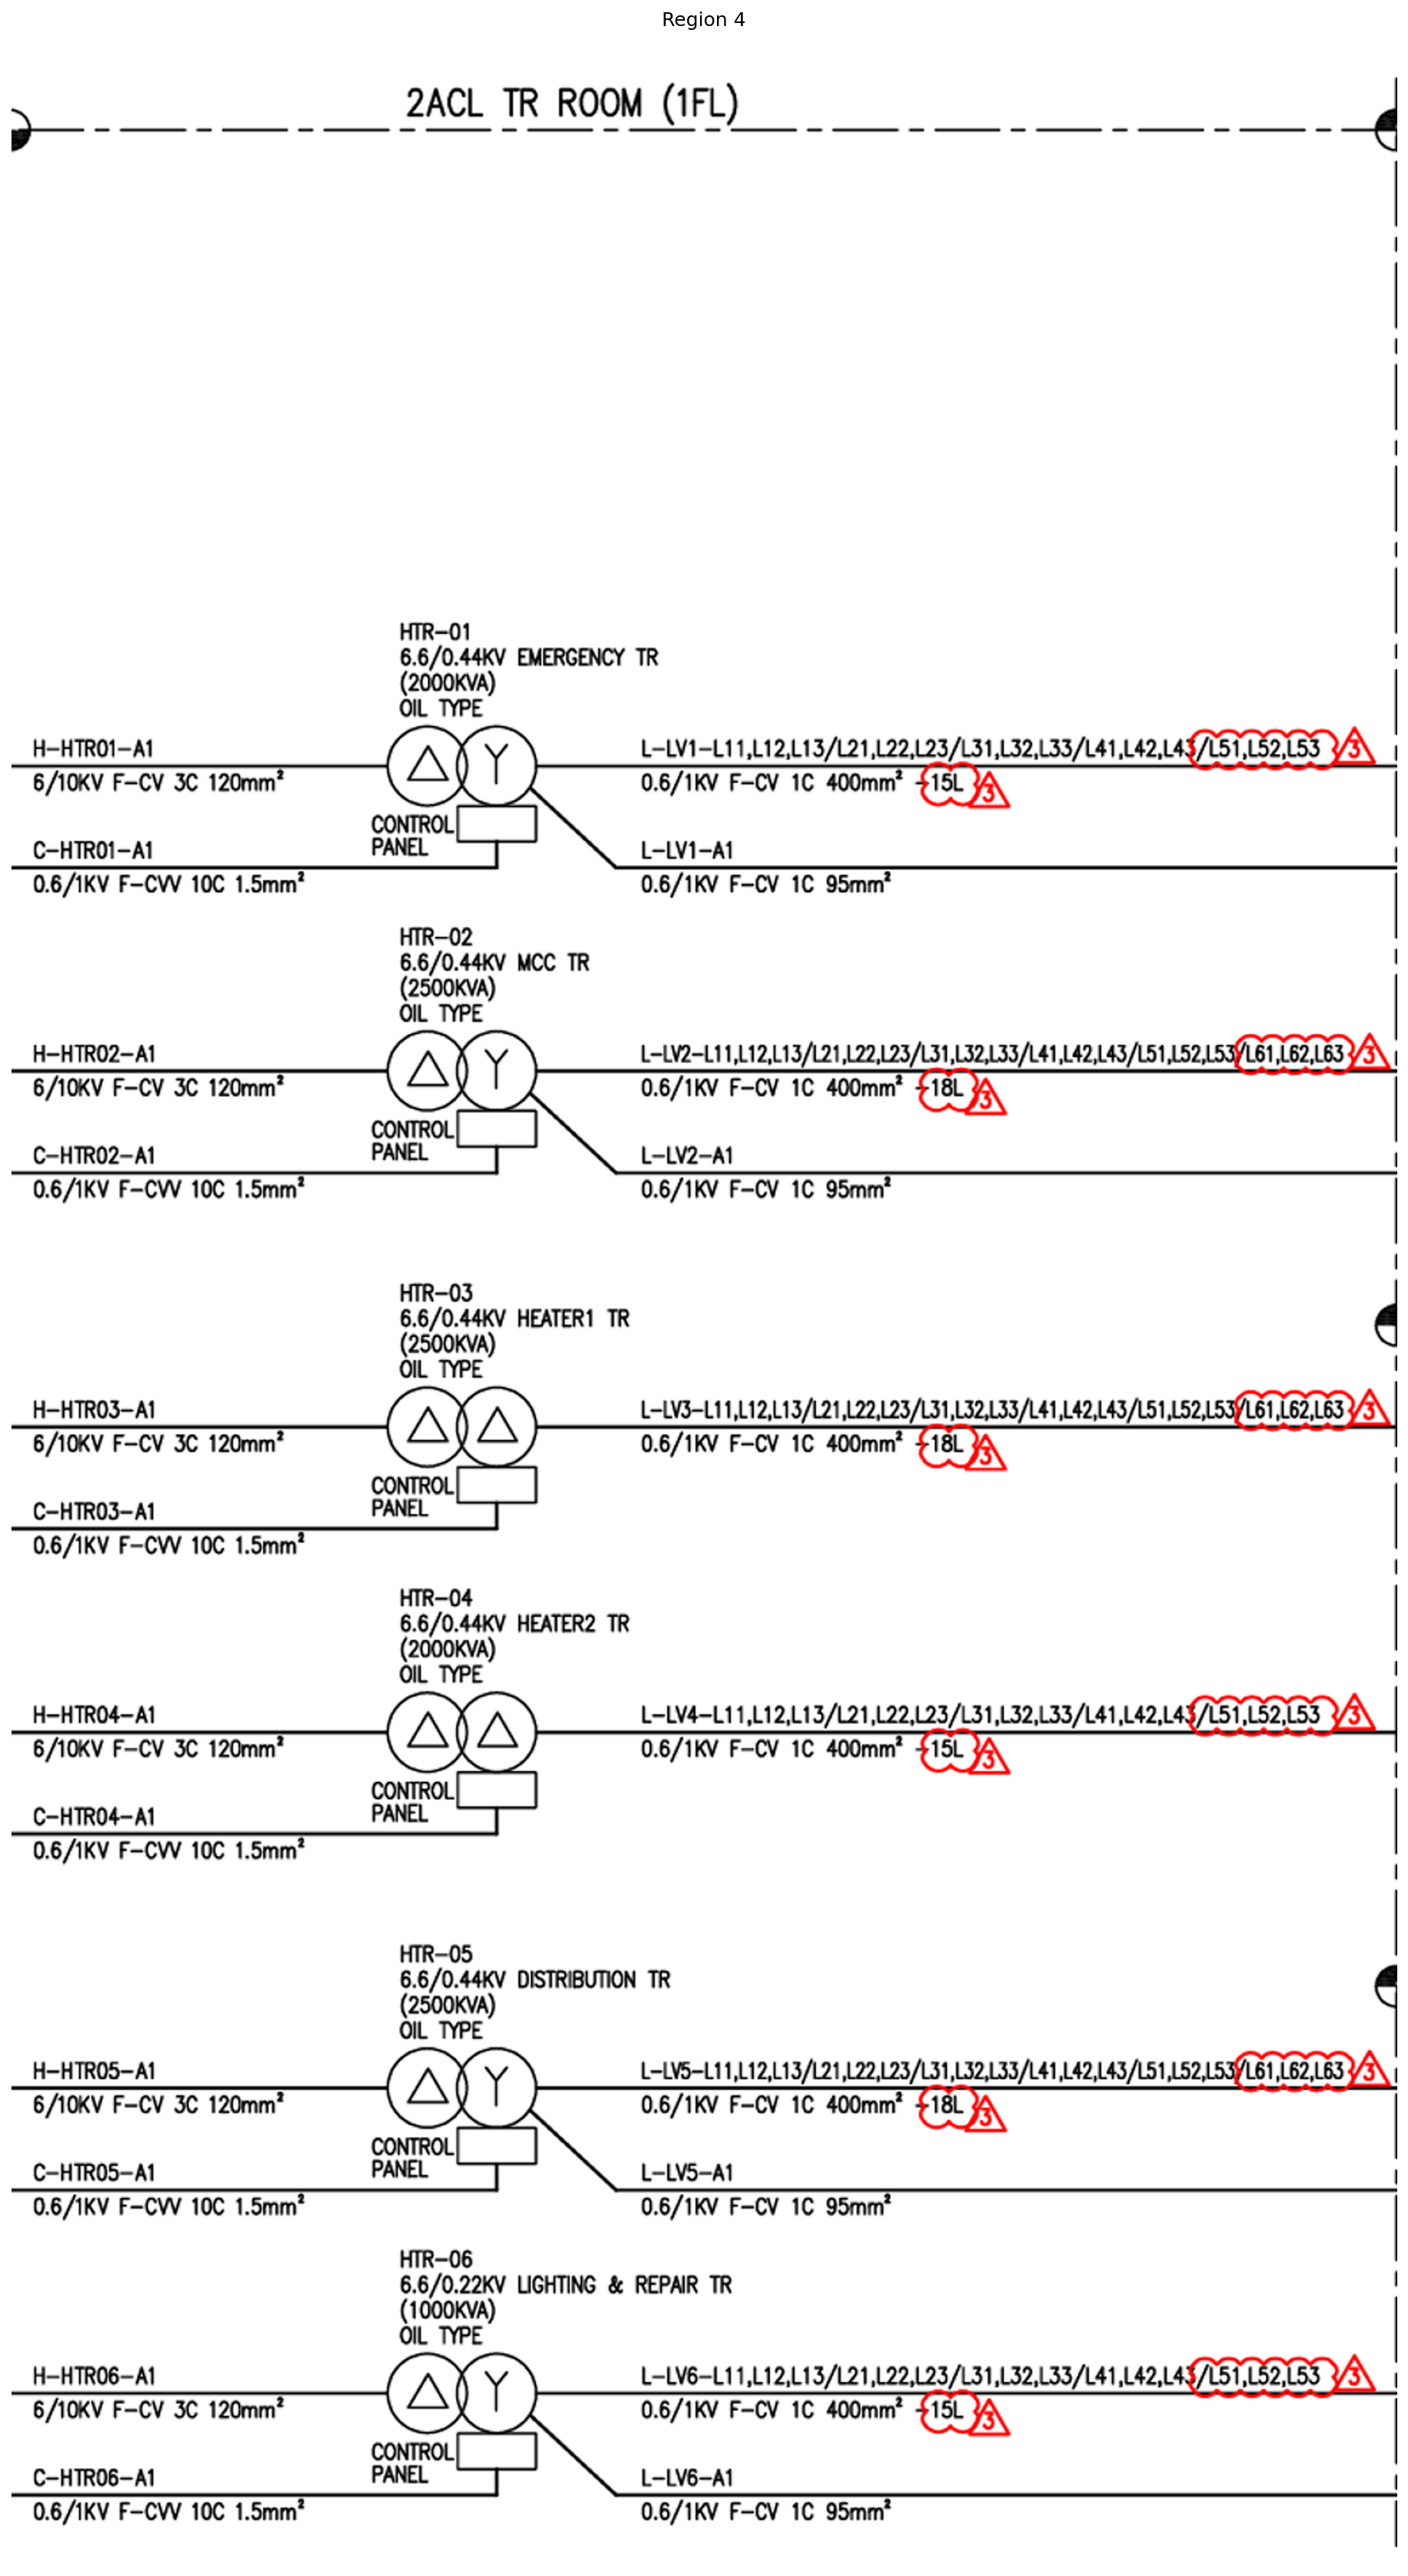

[2025/11/10 05:04:37] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2025/11/10 05:04:37] ppocr DEBUG: dt_boxes num : 85, elapse : 0.12226343154907227
[2025/11/10 05:04:37] ppocr DEBUG: rec_res num  : 85, elapse : 0.32117509841918945
[OCR 완료] Region 4 → 1489 chars
[Region 4] OCR 결과:
2ACL TR ROOM (1FL)
HTR-01
6.6/0.44KV EMERGENCY TR
(2000KVA)
OIL TYPE
H-HTRO1-A1
L-LV1-L11,L12,L13/L21,L22,L23/L31,L32,L33/L41,L42,L4$/L51,L52,L53 /3
0.6/1KV F-cv 1C 400mm 15L3
6/10KV F-CV 3C 120mma
CONTROL
PANEL
C-HTR01-A1
L-LV1-A1
0.6/1KV F-CW 10C 1.5mm?
0.6/1KV F-CV 1C 95mm
HTR-02
6.6/0.44KV MCC TR
(2500KVA)
OIL TYPE
H-HTR02-A1
L-LV2-L11,L12,L13/L21,L22,L23/L31,L32,L33/L41,L42,L43/L51,L52,L53/L61,L62,L63/3\
6/10KV F-CV 3C 120mm
CONTROL
PANEL
C-HTR02-A1
L-LV2-A1
0.6/1KV F-CW 10C 1.5mm2
0.6/1KV F-CV 1C 95mm
HTR-03
6.6/0.44KV HEATER1 TR
(2500KVA)
OIL TYPE
L-LV3-L11,L12,L13/L21,L22,L23/L31,L32,L33/L41,L42,L43/L51,L52,L53L61,L62,L

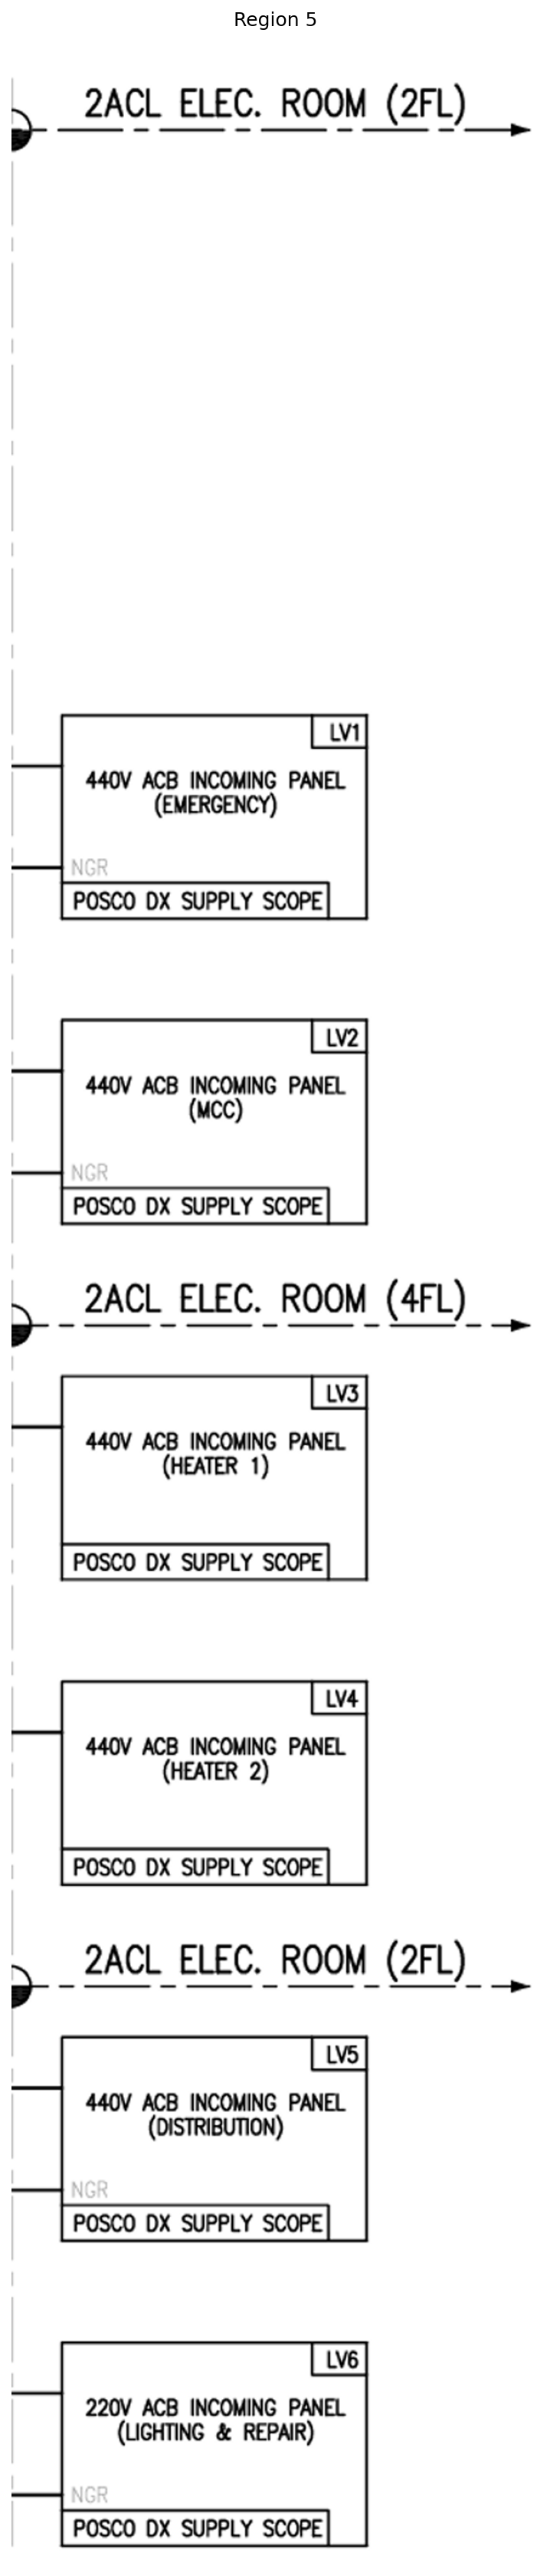

[2025/11/10 05:04:38] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2025/11/10 05:04:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.0504457950592041
[2025/11/10 05:04:38] ppocr DEBUG: rec_res num  : 29, elapse : 0.10348892211914062
[OCR 완료] Region 5 → 446 chars
[Region 5] OCR 결과:
2ACL ELEC. ROOM (2FL)
LV1
440V ACB INCOMING PANEL
(EMERGENCY)
POSCO DX SUPPLY SCOPE
LV2
440V ACB INCOMING PANEL
(MCC)
NGR
POSCO DX SUPPLY SCOPE
2ACL ELEC. ROOM (4FL)
LV3
440V ACB INCOMING PANEL
HEATER 1
POSCO DX SUPPLY SCOPE
Lv4
440V ACB INCOMING PANEL
(HEATER 2)
POSCO DX SUPPLY SCOPE
2ACL ELEC. ROOM (2FL)
LV5
440V ACB INCOMING PANEL
(DISTRIBUTION)
POSCO DX SUPPLY SCOPE
Lv6
220V ACB INCOMING PANEL
(LIGHTING & REPAIR)
NGR
POSCO DX SUPPLY SCOPE


✅ 모든 OCR 완료!


In [6]:
# ROI 저장 및 OCR 수행
ocr_results = {}

# OCR 수행
ocr_results = {}
ocr_paddle = PaddleOCR(use_textline_orientation=True, lang='en',device='gpu')           # use_angle_cls -> use_textline_orientation

for region_id, roi in regions:
    show_image_highres(roi, f"Region {region_id}", zoom=1.0, dpi=150)

    roi_file = os.path.join(output_path, f'roi_{region_id}.png')
    cv2.imwrite(roi_file, roi)

    # 빈 이미지 필터링
    if cv2.countNonZero(cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)) == 0:
        print(f"[Skip] Region {region_id} is empty.")
        continue

    # Tesseract OCR 실행
    # text = pytesseract.image_to_string(roi, lang=tesseract_lang)
    
    # PaddleOCR 실행
    result = ocr_paddle.ocr(roi,cls=True)
    text = "\n".join([line[1][0] for line in result[0]]) if result else ""
    
    ocr_results[region_id] = text.strip()

    # 결과 텍스트 저장
    with open(os.path.join(output_path, f'roi_{region_id}.txt'), 'w', encoding='utf-8') as f:
        f.write(text)

    print(f"[OCR 완료] Region {region_id} → {len(text)} chars")
    print("=" * 50)
    print(f"[Region {region_id}] OCR 결과:\n{text if text else '(빈 결과)'}")
    print("=" * 50 + "\n")

print("\n✅ 모든 OCR 완료!")